In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [2]:
df = pd.read_csv('../data/spotify-2023.csv', encoding = "ISO-8859-1")
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Fix streams
index = df['streams'].index[df['streams'].apply(np.isnan)]
df = df.drop(index[0])

In [3]:
X = df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%']]#, 'instrumentalness_%', 'liveness_%', 'speechiness_%']]
y = df['streams']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((761, 4), (191, 4), (761,), (191,))

In [4]:
num_neighbors = range(3, 100)
scores = []
for i in num_neighbors:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    

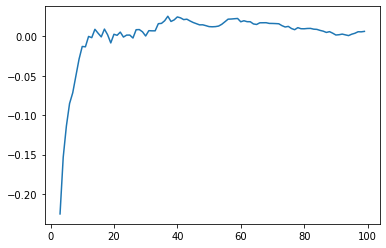

In [5]:
plt.plot(num_neighbors, scores)

In [6]:
scores[35:40]

[0.019062960832612053,
 0.021071679373184327,
 0.024817706889439184,
 0.023619001716107202,
 0.02140104104791518]

array([[<AxesSubplot:title={'center':'danceability_%'}>,
        <AxesSubplot:title={'center':'valence_%'}>],
       [<AxesSubplot:title={'center':'energy_%'}>,
        <AxesSubplot:title={'center':'acousticness_%'}>]], dtype=object)

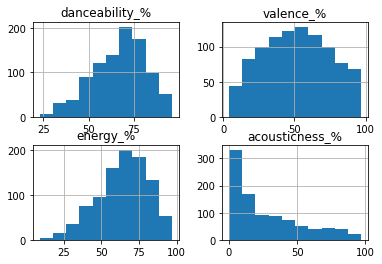

In [7]:
X.hist()

In [8]:
knn = KNeighborsRegressor(n_neighbors=37)

In [9]:
train_size, train_scores, test_scores = learning_curve(knn, X_train, y_train)
train_size, train_scores, test_scores

avg_train_scores = train_scores.mean(axis=1)
avg_test_scores = test_scores.mean(axis=1)

Text(0, 0.5, 'Train/test score')

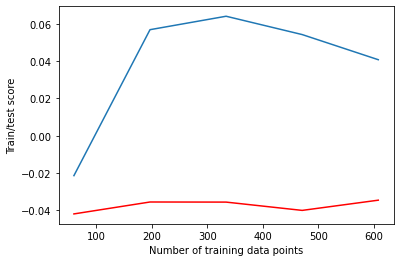

In [10]:
plt.plot(train_size, avg_train_scores)
plt.plot(train_size, avg_test_scores, 'r')
plt.xlabel('Number of training data points')
plt.ylabel('Train/test score')

In [12]:
train_scores

array([[ 0.01072073, -0.02945841, -0.02945841, -0.02945841, -0.02945841],
       [ 0.04432135,  0.02441432,  0.07194617,  0.07194617,  0.07194617],
       [ 0.05410704,  0.03199688,  0.0979027 ,  0.0683176 ,  0.0683176 ],
       [ 0.04540272,  0.03537947,  0.06531299,  0.06416659,  0.06118777],
       [ 0.03386188,  0.0307685 ,  0.0570552 ,  0.03268148,  0.04962117]])

In [14]:
X.corr()

,danceability_%,valence_%,energy_%,acousticness_%
danceability_%,1.000000,0.409873,0.198485,-0.237128
valence_%,0.409873,1.000000,0.357516,-0.081161
energy_%,0.198485,0.357516,1.000000,-0.577318
acousticness_%,-0.237128,-0.081161,-0.577318,1.000000
